### importing necessary packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow
from keras.layers import Conv1D, MaxPooling1D, GRU, Flatten, Dense
from keras.models import Sequential
from tensorflow.keras.layers import Dropout

### Definations

###  Six different types of frauds are present in this dataset.
#### 1) The first type of theft consists of a considerable reduction of electricity consumption during the day. This reduction is calculated by multiplying the consumption by the randomly chosen value between 0.1 and 0.8. 
#### 2) In the second type of theft, electricity consumption drops to zero at random and during an arbitrary period.
#### 3) The third type of theft is similar to the first type, but each consumption value (each hour) is multiplied by a random number.
#### 4) A random fraction of the mean consumption is generated for the fourth type of theft.
#### 5) The fifth type reports the mean consumption, and 
#### 6) The last type of theft (i.e., the sixth type) reverses the order of readings. 

### Feature Explanations
#### Electricity:Facility kW: This attribute represents the total electricity consumption of the building, including lighting, appliances, and other electrical systems.

#### Fans:Electricity kW: This attribute represents the electricity consumption of fans used for ventilation or cooling purposes.

#### Cooling:Electricity kW: This attribute represents the electricity consumption of cooling systems such as air conditioners or refrigeration units.

#### Heating:Electricity kW: This attribute represents the electricity consumption of heating systems such as electric heaters or heat pumps.

#### InteriorLights:Electricity kW: This attribute represents the electricity consumption of all interior lights within the building.

#### InteriorEquipment:Electricity kW: This attribute represents the electricity consumption of all other interior equipment within the building, such as computers, printers, and other electrical appliances.

#### Gas:Facility kW: This attribute represents the total gas consumption of the building, including heating and other gas appliances.

#### Heating:Gas kW: This attribute represents the gas consumption of heating systems such as furnaces or boilers.

#### InteriorEquipment:Gas kW: This attribute represents the gas consumption of all other gas equipment within the building, such as kitchen appliances.

#### Water Heater:WaterSystems:Gas kW: This attribute represents the gas consumption of the building's water heating system.

###  Why gas consumption taken into consideration?
#### It is common practice in energy analysis to include gas consumption along with electricity consumption, as gas is also a major energy source used in many buildings for heating, hot water, cooking, and other purposes.

#### In the case of electricity theft detection, it is possible that a building's electricity consumption may be underreported or manipulated in some way to avoid detection, but gas consumption may still be a reliable indicator of the building's actual energy usage. By including both electricity and gas consumption in the analysis, it may be easier to detect anomalies or suspicious patterns of energy consumption that could be indicative of electricity theft.

#### Additionally, some methods of electricity theft involve tampering with the gas meter to avoid detection of the stolen electricity. In such cases, monitoring gas consumption along with electricity consumption can help identify discrepancies that may indicate theft. Therefore, gas consumption can be a valuable attribute to consider in the context of electricity theft detection.



### loading dataset

In [3]:
df1 = pd.read_csv('df.csv') 

### Preprocessing

In [18]:
df1.isnull().sum()

0                                             0
Electricity:Facility [kW](Hourly)             0
Fans:Electricity [kW](Hourly)                 0
Cooling:Electricity [kW](Hourly)              0
Heating:Electricity [kW](Hourly)              0
InteriorLights:Electricity [kW](Hourly)       0
InteriorEquipment:Electricity [kW](Hourly)    0
Gas:Facility [kW](Hourly)                     0
Heating:Gas [kW](Hourly)                      0
InteriorEquipment:Gas [kW](Hourly)            0
Water Heater:WaterSystems:Gas [kW](Hourly)    0
Class                                         0
theft                                         0
dtype: int64

In [20]:
df1.dtypes

0                                               int64
Electricity:Facility [kW](Hourly)             float64
Fans:Electricity [kW](Hourly)                 float64
Cooling:Electricity [kW](Hourly)              float64
Heating:Electricity [kW](Hourly)              float64
InteriorLights:Electricity [kW](Hourly)       float64
InteriorEquipment:Electricity [kW](Hourly)    float64
Gas:Facility [kW](Hourly)                     float64
Heating:Gas [kW](Hourly)                      float64
InteriorEquipment:Gas [kW](Hourly)            float64
Water Heater:WaterSystems:Gas [kW](Hourly)    float64
Class                                           int32
theft                                           int32
dtype: object

In [22]:
df1.shape

(560655, 13)

In [23]:
df1.size

7288515

In [5]:
df1.head()

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft
0,0,22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,Normal
1,1,14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
2,2,14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
3,3,14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,Normal
4,4,14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal


In [7]:
df1['Class'].value_counts()

FullServiceRestaurant     35040
SecondarySchool           35040
Warehouse                 35040
SuperMarket               35040
StripMall                 35040
Stand-aloneRetail         35040
SmallOffice               35040
SmallHotel                35040
QuickServiceRestaurant    35040
Hospital                  35040
PrimarySchool             35040
OutPatient                35040
MidriseApartment          35040
MediumOffice              35040
LargeOffice               35040
LargeHotel                35040
0                            15
Name: Class, dtype: int64

In [9]:
df1['theft'].value_counts()

Normal    331824
Theft1     51083
Theft3     44349
Theft4     41460
Theft6     35413
Theft5     33553
Theft2     22973
Name: theft, dtype: int64

### Convering categorical value into numerical

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['theft'] = le.fit_transform(df1['theft']) 

In [11]:
df1['Class'] = le.fit_transform(df1['Class']) 

### Sampling

In [13]:
df_0 = df1[df1['theft']==0]
df_1 = df1[df1['theft']==1]
df_2 = df1[df1['theft']==2]
df_3 = df1[df1['theft']==3]
df_4 = df1[df1['theft']==4]
df_5 = df1[df1['theft']==5]
df_6 = df1[df1['theft']==6]

In [14]:
df_0_sampled = df_0.sample(51083)
df_1_sampled = df_1.sample(51083,replace=True)
df_2_sampled = df_2.sample(51083,replace=True)
df_3_sampled = df_3.sample(51083,replace=True)
df_4_sampled = df_4.sample(51083,replace=True)
df_5_sampled = df_5.sample(51083,replace=True)
df_6_sampled = df_6.sample(51083,replace=True)


In [39]:
df_balanced = pd.concat([df_0_sampled,df_1_sampled,df_2_sampled,df_3_sampled,df_4_sampled,df_5_sampled,df_6_sampled])
df_balanced.size

4648553

### Feature Importance

In [28]:
X=df_balanced.drop(["0","theft"],axis=1)
y=df_balanced.pop("theft")

In [30]:
rf = RandomForestRegressor(n_estimators=13,random_state=42)
rf.fit(X1, y1)

# Calculate feature importances
importances = rf.feature_importances_

# Sort the features by importance in descending order
indices = np.argsort(importances)[::-1]

In [31]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature Electricity:Facility [kW](Hourly) (0.17854386510016534)
2. feature Fans:Electricity [kW](Hourly) (0.16447075094742022)
3. feature Water Heater:WaterSystems:Gas [kW](Hourly) (0.1297196717048767)
4. feature Gas:Facility [kW](Hourly) (0.1011494280213716)
5. feature Cooling:Electricity [kW](Hourly) (0.09437147316178612)
6. feature InteriorLights:Electricity [kW](Hourly) (0.08710579032359786)
7. feature InteriorEquipment:Electricity [kW](Hourly) (0.08460868111363959)
8. feature Heating:Gas [kW](Hourly) (0.07214892587586315)
9. feature InteriorEquipment:Gas [kW](Hourly) (0.05465618466893133)
10. feature Heating:Electricity [kW](Hourly) (0.016707151710190105)
11. feature Class (0.01651807737215786)


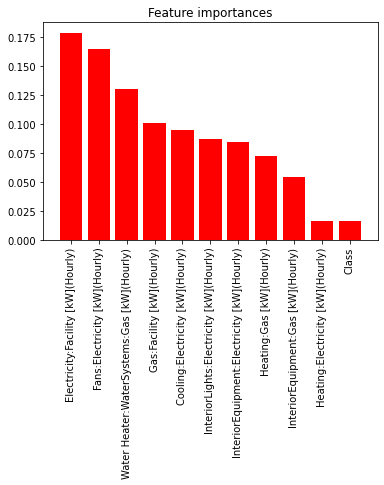

In [32]:
# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [40]:
imp_fea3 = pd.DataFrame(df_balanced.drop(["0","Class","Heating:Electricity [kW](Hourly)"],axis=1))

In [41]:
imp_fea3.head()


,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),theft
63879,161.641569,5.857700,0.000000,80.527626,73.092045,137.768585,128.800697,3.205680,5.762208,0
291243,1017.639700,97.516333,361.829775,166.938926,191.613659,391.147202,316.985988,56.646700,17.514514,0
66876,40.002228,0.000000,0.000000,15.863942,22.030085,6.091012,0.000000,3.205680,2.885332,0
258161,68.697239,9.127270,18.642580,32.837857,8.089532,0.000000,0.000000,0.000000,0.000000,0
430682,1466.375390,101.598209,563.920026,243.259307,310.109712,539.198270,429.716458,70.808375,38.673438,0


In [42]:
print(imp_fea3.shape)
print(imp_fea3.size)

(357581, 10)
3575810


### Scaling the data

In [43]:
X3=imp_fea3.drop(["theft"],axis=1)
y3=imp_fea3.pop("theft")

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler object
scaler = MinMaxScaler()

# Fit and transform the data
X_normalized = scaler.fit_transform(X3)

### Model Creation

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X_normalized, y3, test_size=0.20, random_state=42)
x_train_array=np.asarray(x_train)
x_train_t = x_train_array.reshape(-1, x_train_array.shape[1], 1)
x_test_array=np.asarray(x_test)
x_test_t = x_test_array.reshape(-1, x_test_array.shape[1], 1)
y_train_array=np.asarray(y_train)
y_test_array=np.asarray(y_test)
train_labels = keras.utils.to_categorical(y_train_array)
test_labels = keras.utils.to_categorical(y_test_array)
n_timesteps, n_features = x_train.shape
print("n_timesteps",n_timesteps)

n_timesteps 286064


In [50]:

model = Sequential()

# Add the 1D CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train_t.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Add the GRU layers
model.add(GRU(units=128, return_sequences=True))
model.add(GRU(units=128, return_sequences=True))
model.add(GRU(units=128))

# Add the output layer
model.add(Dense(train_labels.shape[1], activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 7, 64)             256       
                                                                 
 conv1d_5 (Conv1D)           (None, 5, 64)             12352     
                                                                 
 gru_6 (GRU)                 (None, 5, 128)            74496     
                                                                 
 gru_7 (GRU)                 (None, 5, 128)            99072     
                                                                 
 gru_8 (GRU)                 (None, 128)               99072     
                                                                 
 dense_2 (Dense)             (None, 7)                 903       
                                                                 
Total params: 286,151
Trainable params: 286,151
Non-tr

### Training the data

In [51]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)
# Train the model
history=model.fit(x_train_t,train_labels, batch_size=64, epochs=75, validation_data=(x_test_t,test_labels),callbacks=[es])

Epoch 1/75
4470/4470 [==============================] - 102s 22ms/step - loss: 1.3840 - accuracy: 0.4253 - val_loss: 1.1829 - val_accuracy: 0.5210
Epoch 2/75
4470/4470 [==============================] - 92s 21ms/step - loss: 1.0139 - accuracy: 0.5720 - val_loss: 0.9507 - val_accuracy: 0.5852
Epoch 3/75
4470/4470 [==============================] - 95s 21ms/step - loss: 0.8537 - accuracy: 0.6200 - val_loss: 0.7942 - val_accuracy: 0.6372
Epoch 4/75
4470/4470 [==============================] - 105s 24ms/step - loss: 0.7896 - accuracy: 0.6416 - val_loss: 0.7616 - val_accuracy: 0.6465
Epoch 5/75
4470/4470 [==============================] - 110s 25ms/step - loss: 0.7484 - accuracy: 0.6528 - val_loss: 0.7295 - val_accuracy: 0.6581
Epoch 6/75
4470/4470 [==============================] - 100s 22ms/step - loss: 0.7237 - accuracy: 0.6617 - val_loss: 0.7538 - val_accuracy: 0.6466
Epoch 7/75
4470/4470 [==============================] - 100s 22ms/step - loss: 0.7036 - accuracy: 0.6684 - val_loss: 0.6

In [52]:
y_predict=model.predict(x_test_t)
final=[]
for i in y_predict:
    max_index=np.argmax(i)
    binary_output=np.zeros_like(i)
    binary_output[max_index]=1
    final.append(binary_output)
    
final_test = []

# iterate over the list and find the index of elements with value 1
for my_list in test_labels:
    for i in range(len(my_list)):
        if my_list[i] == 1:
            final_test.append(i)
            
final_predict = []

# iterate over the list and find the index of elements with value 1
for my_list in final:
    for i in range(len(my_list)):
        if my_list[i] == 1:
            final_predict.append(i)


2235/2235 [==============================] - 13s 5ms/step


### Confision matrix

[[ 8587    23     0    23     5    53  1601]
 [   65  6511     0  3072   325    26   247]
 [    0     0 10167     0     0     0     0]
 [   52  4492     0  5188   363    27   220]
 [    1   214     0   149  9677     7    90]
 [   37    13     0     8    18  9788   179]
 [ 5138  1007     0   686   808   682  1968]]


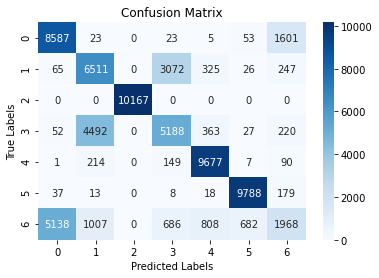

In [53]:
from sklearn.metrics import confusion_matrix



# create confusion matrix
cm = confusion_matrix(final_test,final_predict)

# print confusion matrix
print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(final_test), yticklabels=np.unique(final_test))

# add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# show plot
plt.show()

### Classification Report

In [54]:
from sklearn.metrics import classification_report
print(classification_report(final_test,final_predict))
  

              precision    recall  f1-score   support

           0       0.62      0.83      0.71     10292
           1       0.53      0.64      0.58     10246
           2       1.00      1.00      1.00     10167
           3       0.57      0.50      0.53     10342
           4       0.86      0.95      0.91     10138
           5       0.92      0.97      0.95     10043
           6       0.46      0.19      0.27     10289

    accuracy                           0.73     71517
   macro avg       0.71      0.73      0.71     71517
weighted avg       0.71      0.73      0.71     71517



### Saving Model

In [55]:
model.save('model-F3-M1-64')

# Save only the model weights
model.save_weights('model-F3-M1-64')

INFO:tensorflow:Assets written to: model-F3-M1-64\assets


INFO:tensorflow:Assets written to: model-F3-M1-64\assets


In [57]:
# Load the entire model
model = tensorflow.keras.models.load_model('model-F3-M1-64')

# Load only the model weights
model.load_weights('model-F3-M1-64')

### Accuracy graph

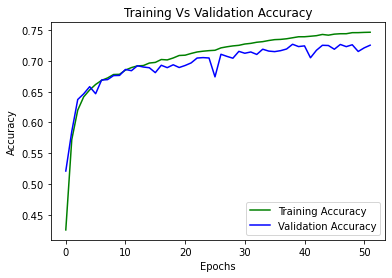

In [60]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(0,52)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Loss graph

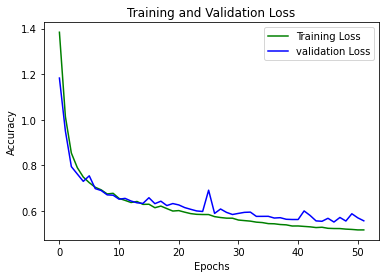

In [61]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(0,52)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Prediction

In [73]:
def predict(a,b,c,d,e,f,g,h,i):
    test=[[a,b,c,d,e,f,g,h,i]]
    import tensorflow as tf
    test=np.asarray(test)
    test=test.reshape(-1, test.shape[1], 1)
     # Load the entire model
    model1 = tf.keras.models.load_model('model-F3-M1-64')
    # Load only the model weights
    model1.load_weights('model-F3-M1-64')
    y_predict=model1.predict(test)
    #print(y_predict)
    final=[]
    for i in y_predict:
        max_index=np.argmax(i)
        binary_output=np.zeros_like(i)
        binary_output[max_index]=1
        final.append(binary_output)
        #print(final)
    final_test = []

# iterate over the list and find the index of elements with value 1
    for my_list in final:
        for i in range(len(my_list)):
            if my_list[i] == 1:
                final_test.append(i)
    print(final_test)
    

    for i in range(len(final_test)):
        if final_test[i] == 0:
            output= "Consumer belongs to normal type"
        elif final_test[i] == 1:
            output= "Consumer belongs to theft 1 type"
        elif final_test[i] == 2:
            output= "Consumer belongs to theft 2 type"
        elif final_test[i] == 3:
            output= "Consumer belongs to theft 3 type"
        elif final_test[i] == 4:
            output= "Consumer belongs to theft 4 type"
        elif final_test[i] == 5:
            output= "Consumer belongs to theft 5 type"
        elif final_test[i] == 6:
            output= "Consumer belongs to theft 6 type"
    output = output

In [70]:
import warnings
warnings.filterwarnings("ignore")

In [79]:
def predict(a,b,c,d,e,f,g,h,i):
    test=[[a,b,c,d,e,f,g,h,i]]
    import tensorflow as tf
    test=np.asarray(test)
    test=test.reshape(-1, test.shape[1], 1)
     # Load the entire model
    
    y_predict=model.predict(test)
    #print(y_predict)
    final=[]
    for i in y_predict:
        max_index=np.argmax(i)
        binary_output=np.zeros_like(i)
        binary_output[max_index]=1
        final.append(binary_output)
        #print(final)
    final_test = []

# iterate over the list and find the index of elements with value 1
    for my_list in final:
        for i in range(len(my_list)):
            if my_list[i] == 1:
                final_test.append(i)
    
    

    for i in range(len(final_test)):
        if final_test[i] == 0:
            output= "Consumer belongs to normal type"
        elif final_test[i] == 1:
            output= "Consumer belongs to theft 1 type"
        elif final_test[i] == 2:
            output= "Consumer belongs to theft 2 type"
        elif final_test[i] == 3:
            output= "Consumer belongs to theft 3 type"
        elif final_test[i] == 4:
            output= "Consumer belongs to theft 4 type"
        elif final_test[i] == 5:
            output= "Consumer belongs to theft 5 type"
        elif final_test[i] == 6:
            output= "Consumer belongs to theft 6 type"
    return output

In [80]:
predict(58.661057,16.292027 ,15.961208 ,2.732531 ,23.612374 ,70.015399 ,66.085761 ,3.616971 ,0.312667)

1/1 [==============================] - 0s 91ms/step


'Consumer belongs to theft 6 type'

In [81]:
predict(0,0,0,0,0,0,0,0,0)

1/1 [==============================] - 2s 2s/step


'Consumer belongs to theft 2 type'